In [205]:
%run chillscript.py
%matplotlib inline

In [2]:
time = 266
import random
print random.uniform(0,time)

164.681583364


In [6]:
i = 1
tlen = len(x/sr)


filename = fil+'songs/'+eachSong['folder'][i]+'/'+eachSong['song'][i]+'.mp3'
x, sr = librosa.load(filename)

for i in range(0,tlen,1):
    songid = int(timetables[i][-1:])
    partid = int(timetables[i].split('_', 1)[0].replace('.', '')[1:])
    song = songdir + parts[partid] + '/' + songsel[songid] + '.mp3'
    timetable = savedir+'timetables/'+timetables[i]
    command = 'cutmp3 -i' +' '+song +' -f'+' '+timetable
    check.append(command)
    counter = counter+1
    os.system(command)

NameError: name 'timetables' is not defined

In [33]:
'''randomly selecting non chills stimuli'''

import os

check = []
counter = 0

for i in range(len(eachSong)):
    filename = fil+'songs/'+eachSong['folder'][i]+'/'+eachSong['song'][i]+'.mp3'
    x, sr = librosa.load(filename)
    time = len(x)/sr
    start = []
    end = []
    for j in range(0,6,1):
        y = random.uniform(0,time)
        z = y+3
        if z > time:
            z = time
            continue
        start.append(y)
        end.append(z)
#         command = 'cutmp3 -i' +' '+filename +' -a '+str(y)+' -b '+str(z)
        check.append(command)
        counter = counter+1
#         os.system(command)

In [ ]:
'''randomly resampling chills stimuli removing bias'''

import os

check = []
counter = 0

for i in range(len(eachSong)):
    filename = fil+'songs/'+eachSong['folder'][i]+'/'+eachSong['song'][i]+'.mp3'
    x, sr = librosa.load(filename)
    time = len(x)/sr

        command = 'cutmp3 -i' +' '+filename +' -a '+str(y)+' -b '+str(z)
        check.append(command)
        counter = counter+1
        os.system(command)

In [ ]:
timetables = os.listdir('/home/tejaswik/Documents/CurrentProjects/chills/chop/timetables/')
savedir = '/home/tejaswik/Documents/CurrentProjects/chills/chop/'
songdir = '/home/tejaswik/Documents/CurrentProjects/chills/songs/'
songsel = {0 : 's1', 1 : 's2', 2 : 's3'}

tlen = len(timetables)

check = []
counter = 0

'''to create chips - careful'''

for i in range(0,tlen,1):
    songid = int(timetables[i][-1:])
    partid = int(timetables[i].split('_', 1)[0].replace('.', '')[1:])
    song = songdir + parts[partid] + '/' + songsel[songid] + '.mp3'
    timetable = savedir+'timetables/'+timetables[i]
    command = 'cutmp3 -i' +' '+song +' -f'+' '+timetable
    check.append(command)
    counter = counter+1
#     os.system(command)

### Chills per person

In [22]:
order = pd.Series.unique(eachSong['folder'])
len(order)

51

In [210]:
chills = pd.DataFrame.from_csv('./finalchills.csv')
chills['moment'] = chills['start']+1.5
int(chills.iloc[1,:]['participant'])

0

## Make a list of lengths of songs for eachSong, and compare to chill moments

In [32]:
eachSong.iloc[i][]

folder    AnneMarteOppstad
song                    s1
Name: 0, dtype: object

In [40]:
times = []

for i in range(len(eachSong)):
    filename = fil+'songs/'+eachSong['folder'][i]+'/'+eachSong['song'][i]+'.mp3'
    x, sr = librosa.load(filename)
    time = len(x)/sr
    times.append(time)

In [216]:
eachSong.head()
eachSong['times'] = times

In [208]:
songsel = {0 : 's1', 1 : 's2', 2 : 's3'}
ivsongsel = {'s1':0,'s2':1,'s3':2}
# eachSong['participant'== order[a],'song' == songsel[b]]


In [217]:
chillsTimes = []
for i in range(len(chills)):
    a = int(chills.iloc[i,:]['participant'])
    b = int(chills.iloc[i,:]['song'])
    chillsTimes.append(int(eachSong.loc[(eachSong['folder'] == order[a]) & (eachSong['song'] ==songsel[b])]['times']))

In [218]:
chills['songlen'] = chillsTimes
chills.to_csv('chills.csv',encoding='utf-8')

In [219]:
chills.head()

,participant,song,start,end,moment,songlen
id,,,,,,
1,0,0,366.679652,369.679652,368.179652,434
2,0,0,255.747427,258.747428,257.247427,434
3,0,0,65.149333,68.149333,66.649333,434
4,0,0,188.114771,191.114771,189.614771,434
5,0,0,326.546719,329.546719,328.046719,434


In [221]:
order = order.tolist()

In [222]:
chillpersong = []
for i in range(len(eachSong)):
    a = order.index(str(eachSong.iloc[i,:]['folder']))
    b = int(ivsongsel[str(eachSong.iloc[i,:]['song'])])
    chillpersong.append(len(chills[(chills['participant'] == a) & (chills['song'] == b)]))

In [278]:
eachSong['chillpersong'] = chillpersong
eachSong.to_csv('eachSong.csv',encoding='utf-8')

## Songlength vs moment

In [224]:
ratio = []
for i in range(len(chills)):
    ratio.append(chills.iloc[i,:]['moment']/chills.iloc[i,:]['songlen'])
chills['ratio'] = ratio

In [225]:
chills.to_csv('chills.csv',encoding='utf-8')

In [237]:
chills.head()

,participant,song,start,end,moment,songlen,ratio
id,,,,,,,
1,0,0,366.679652,369.679652,368.179652,434,0.848340
2,0,0,255.747427,258.747428,257.247427,434,0.592736
3,0,0,65.149333,68.149333,66.649333,434,0.153570
4,0,0,188.114771,191.114771,189.614771,434,0.436900
5,0,0,326.546719,329.546719,328.046719,434,0.755868


In [272]:
eachSong

,folder,song,times,chillpersong,ID
0,AnneMarteOppstad,s1,434,31,0
1,AnneMarteOppstad,s2,266,29,1
2,AnneMarteOppstad,s3,293,27,2
3,AnneLiseStokken,s1,300,15,3
4,AnneLiseStokken,s2,267,55,4
5,AnneLiseStokken,s3,242,22,5
6,RunaMyhrer,s1,294,0,6
7,RunaMyhrer,s2,196,0,7
8,RunaMyhrer,s3,257,1,8
9,OscarTronrud,s1,355,9,9


In [254]:
songid = []
for i in range(len(chills)):
    a = int(chills.iloc[i,:]['participant'])
    b = int(chills.iloc[i,:]['song'])
    songid.append(int(eachSong.loc[(eachSong['folder'] == order[a]) & (eachSong['song'] ==songsel[b])]['ID']))

In [281]:
len(chills[chills.ratio>0.5])

589

Text(0,0.5,u'ChillRatio')

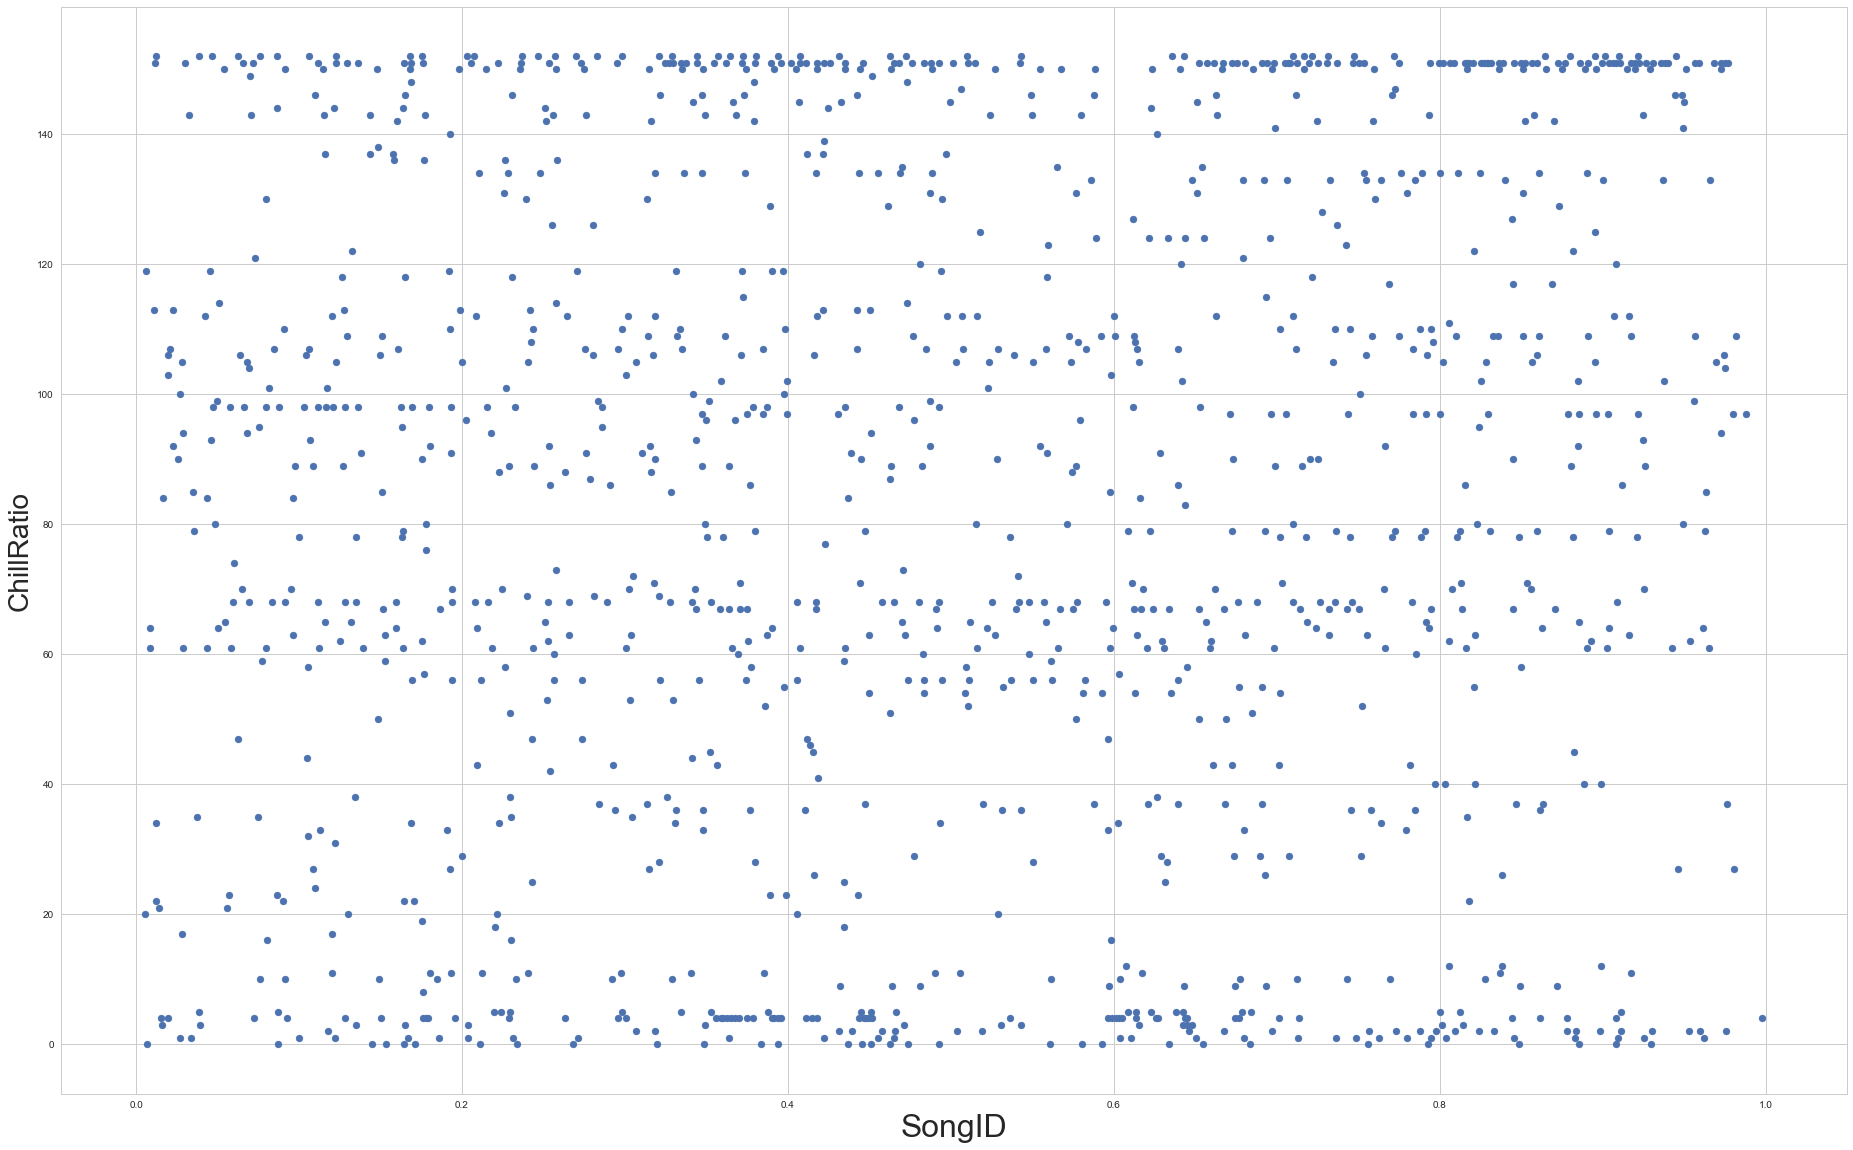

In [279]:
import seaborn as sns
sns.set_style('whitegrid')
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10},
fig,ax = plt.subplots(figsize = (32,20))
ax = plt.scatter(chills['ratio'], chills['songid'])
plt.xlabel('SongID',fontsize='32')
plt.ylabel('ChillRatio',fontsize = '28')
# plt.setp(ax.get_legend().get_texts(), fontsize='28') # for legend text\n",
# plt.setp(ax.get_legend().get_title(), fontsize='2') # for legend title\n"
